In [24]:
import os
import pandas as pd



database = 'Diabetes'
#database = 'w3a'
#database = 'a5a'

#database = 'eunite2001'
#database = 'abalone'
#database = 'CPU_SMALL'

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/variance-or-random-features-stimators/'
results_directory = path + f'results/{database}/'  # Replace this with the path to your directory
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
n_components_column_name = 'n-components'
total_training_time_mean_column = 'transform-and-training-time-mean'
total_training_time_std_column = 'transform-and-training-time-std'
# relevant column names 
# fit-time-mean,fit-time-std,transform-time-mean,transform-time-std,score-mean,score-std
transform_time_mean_column = 'transform-time-mean'
transform_time_std_column = 'transform-time-std'
training_time_mean_column = 'training-time-mean'
training_time_std_column = 'training-time-std'


# Get a list of all files in the directory
files = [file for file in os.listdir(results_directory) if os.path.isfile(os.path.join(results_directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
stats_files = [file for file in files if ("stats" in file and  'verbose' not in file)]
stats_files.sort() # kernel methods será el primero

kernel_files = [file for file in stats_files if ('0njjnjl' in file and 'kernel-linear' not in file)]
random_features_files = [file for file in stats_files if file not in kernel_files]


# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    # mean
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    data['File'] = file  # Add a column to identify the file 
    
    random_features_data = pd.concat([random_features_data, data], ignore_index=True)
    random_features_list.append(data)
    random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

    data['File'] = file  # Add a column to identify the file
    data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
    
    kernel_data = pd.concat([kernel_data, data], ignore_index=True)
    kernel_list.append(data)
    kernel_list_names.append(file.replace('-stats.csv', ''))

print('Random fourier  files')
print(random_features_list_names)
print('kernel files')
print(kernel_list_names)
kernel_data



['results.dict', 'RFF-low-variance-estimator-estimator-variance-kernel-stats-a.csv', 'RFF-sklearn-estimator-variance-kernel-stats-a.csv', 'RFF-sklearn-verbose.csv', 'RFF-low-variance-estimator-verbose.csv']
Random fourier  files
['RFF-low-variance-estimator-estimator-variance-kernel-stats-a.csv', 'RFF-sklearn-estimator-variance-kernel-stats-a.csv']
kernel files
[]


""


In [19]:
random_features_data

,n-components,fit-time-mean,fit-time-std,transform-time-mean,transform-time-std,score-mean,score-std,File
0,27,0.000052,0.000005,0.000114,0.000010,0.624560,0.003071,RFF-low-variance-estimator-estimator-variance-...
1,32,0.000049,0.000009,0.000134,0.000010,0.575891,0.004067,RFF-low-variance-estimator-estimator-variance-...
2,36,0.000048,0.000005,0.000139,0.000004,0.579298,0.004415,RFF-low-variance-estimator-estimator-variance-...
3,41,0.000073,0.000044,0.000162,0.000012,0.609712,0.005761,RFF-low-variance-estimator-estimator-variance-...
4,46,0.000074,0.000042,0.000183,0.000018,0.576344,0.002011,RFF-low-variance-estimator-estimator-variance-...
...,...,...,...,...,...,...,...,...
75,196,0.000084,0.000005,0.001113,0.000564,0.615790,0.061820,RFF-sklearn-estimator-variance-kernel-stats-a.csv
76,200,0.000076,0.000010,0.001401,0.000854,0.600993,0.076775,RFF-sklearn-estimator-variance-kernel-stats-a.csv
77,205,0.000091,0.000032,0.000918,0.000200,0.609994,0.070515,RFF-sklearn-estimator-variance-kernel-stats-a.csv
78,210,0.000093,0.000032,0.000879,0.000060,0.544862,0.033037,RFF-sklearn-estimator-variance-kernel-stats-a.csv


In [20]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File", column, n_components_column_name]]
   
      return dataframe

In [21]:
# get columns to be plot
mean_columns_to_be_plot = [column for column in random_features_data.columns if 'mean' in column]
std_columns_to_be_plot = [column for column in random_features_data.columns if 'std' in column]


# Sort by score 

In [22]:
#show_dataframe(random_features_data,'score-mean' , ascending=False, n_rows=10)

# Plotting 

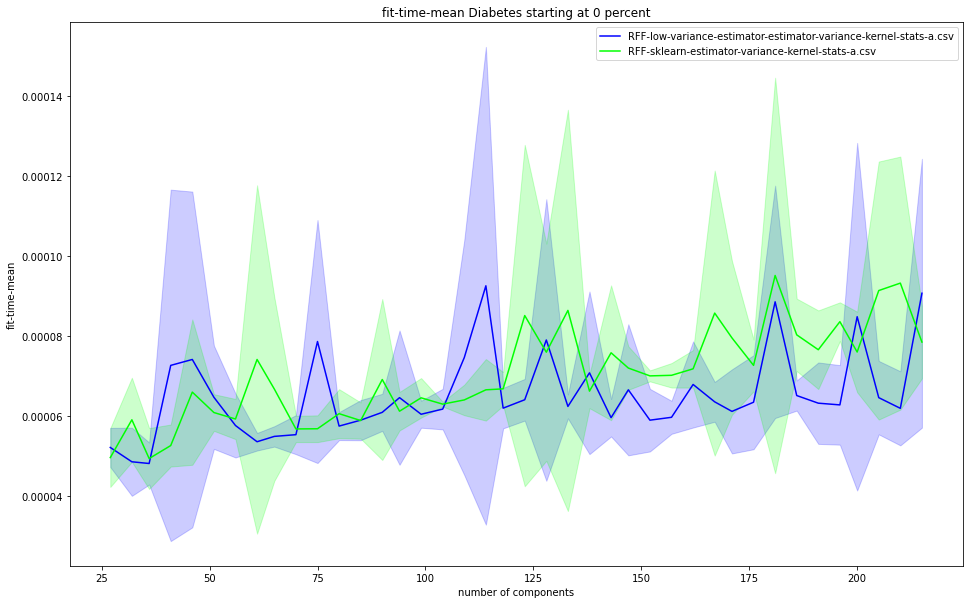

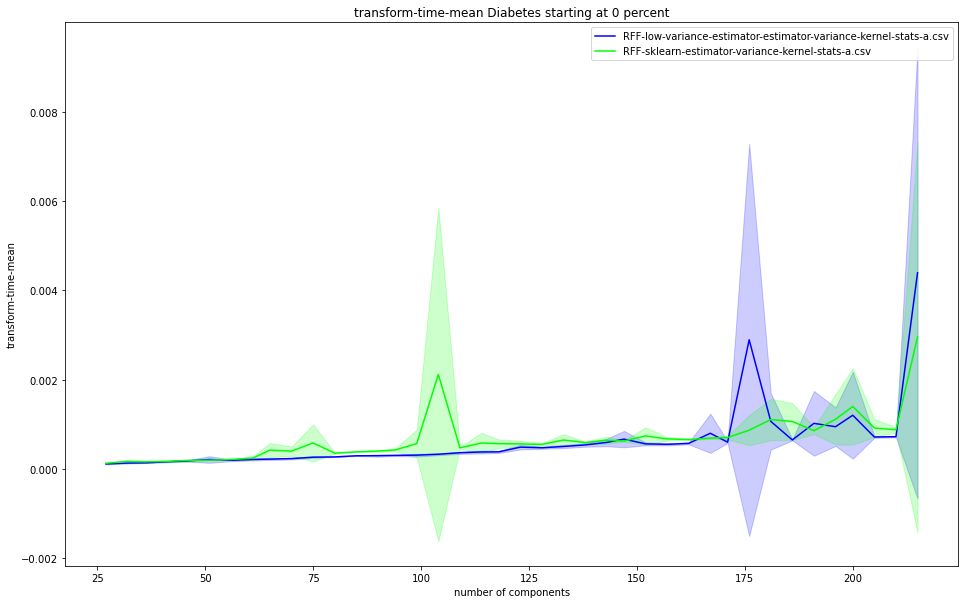

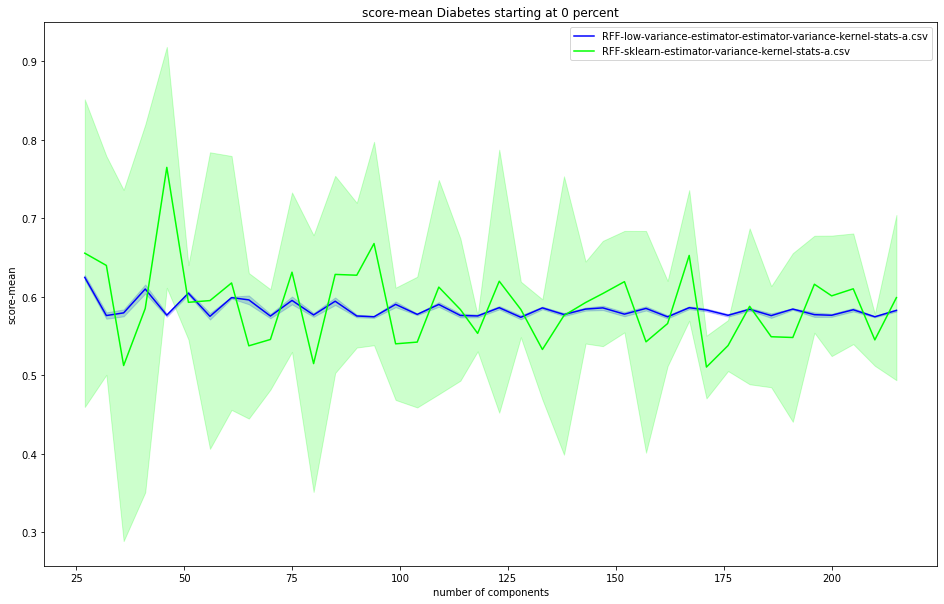

In [23]:
from plotting import view_plots_and_save_them


view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')

